In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from pandas_profiling import profile_report
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [2]:
train_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\train_powe plant.csv")

In [3]:
train_data.head()

,AT,V,AP,RH,PE
0,22.85,60.29,1017.29,61.92,448.58
1,11.75,35.76,1018.99,57.92,473.01
2,12.24,44.90,1020.31,82.22,464.25
3,13.43,40.10,1015.82,87.90,471.77
4,4.65,35.19,1018.23,94.78,489.36


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      8000 non-null   float64
 1   V       8000 non-null   float64
 2   AP      8000 non-null   float64
 3   RH      8000 non-null   float64
 4   PE      8000 non-null   float64
dtypes: float64(5)
memory usage: 312.6 KB


In [5]:
train_data.shape

(8000, 5)

In [6]:
train_data.columns

Index(['AT', 'V', 'AP', 'RH', 'PE'], dtype='object')

In [7]:
train_data.describe()

,AT,V,AP,RH,PE
count,8000.000000,8000.000000,8000.000000,8000.000000,8000.000000
mean,19.677299,54.302629,1013.235534,73.260477,454.310364
std,7.448395,12.687358,5.920858,14.588452,17.056199
min,2.340000,25.360000,993.110000,25.560000,420.260000
25%,13.510000,41.740000,1009.070000,63.340000,439.727500
50%,20.320000,52.080000,1012.950000,74.880000,451.495000
75%,25.770000,66.540000,1017.190000,84.700000,468.400000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [8]:
train_data.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.843584,-0.505347,-0.538296,-0.947350
V,0.843584,1.000000,-0.409484,-0.308251,-0.869313
AP,-0.505347,-0.409484,1.000000,0.100138,0.515031
RH,-0.538296,-0.308251,0.100138,1.000000,0.385353
PE,-0.947350,-0.869313,0.515031,0.385353,1.000000


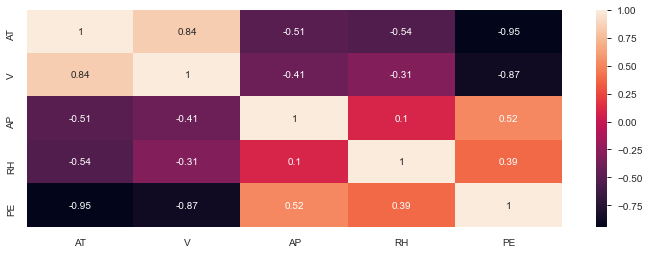

In [9]:
plt.figure(figsize=(12,4))
sns.heatmap(train_data.corr(),annot=True)

In [10]:
#AT and V are high negatively correlated with PE(output variable)

In [11]:
features=train_data.drop(['PE'],axis=1)
label=train_data['PE']

In [12]:
import statsmodels.api as stat
ols=stat.OLS(endog=label,exog=features).fit()
ols.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                        Results: Ordinary least squares
================================================================================
Model:                  OLS              Adj. R-squared (uncentered): 1.000     
Dependent Variable:     PE               AIC:                         48726.4513
Date:                   2021-01-09 13:09 BIC:                         48754.4001
No. Observations:       8000             Log-Likelihood:              -24359.   
Df Model:               4                F-statistic:                 1.599e+07 
Df Residuals:           7996             Prob (F-statistic):          0.00      
R-squared (uncentered): 1.000            Scale:                       25.853    
-------------------------------------------------------------------------------------
            Coef.       Std.Err.          t          P>|t|        [0.025       0.975]
-------------------------------------------------------------------------------------
AT         -1.6711        0.0169       -99.0538      0.0000      -1.7042      -1.6381
V          -0.2768        0.0088       -31.3781      0.0000      -0.2941      -0.2595
AP          0.5029        0.0005      1101.1768      0.0000       0.5020       0.5038
RH         -0.0998        0.0048       -20.6293      0.0000      -0.1093      -0.0903
--------------------------------------------------------------------------------
Omnibus:                  516.465           Durbin-Watson:              2.030   
Prob(Omnibus):            0.000             Jarque-Bera (JB):           1732.893
Skew:                     -0.279            Prob(JB):                   0.000   
Kurtosis:                 5.211             Condition No.:              335     
================================================================================

"""

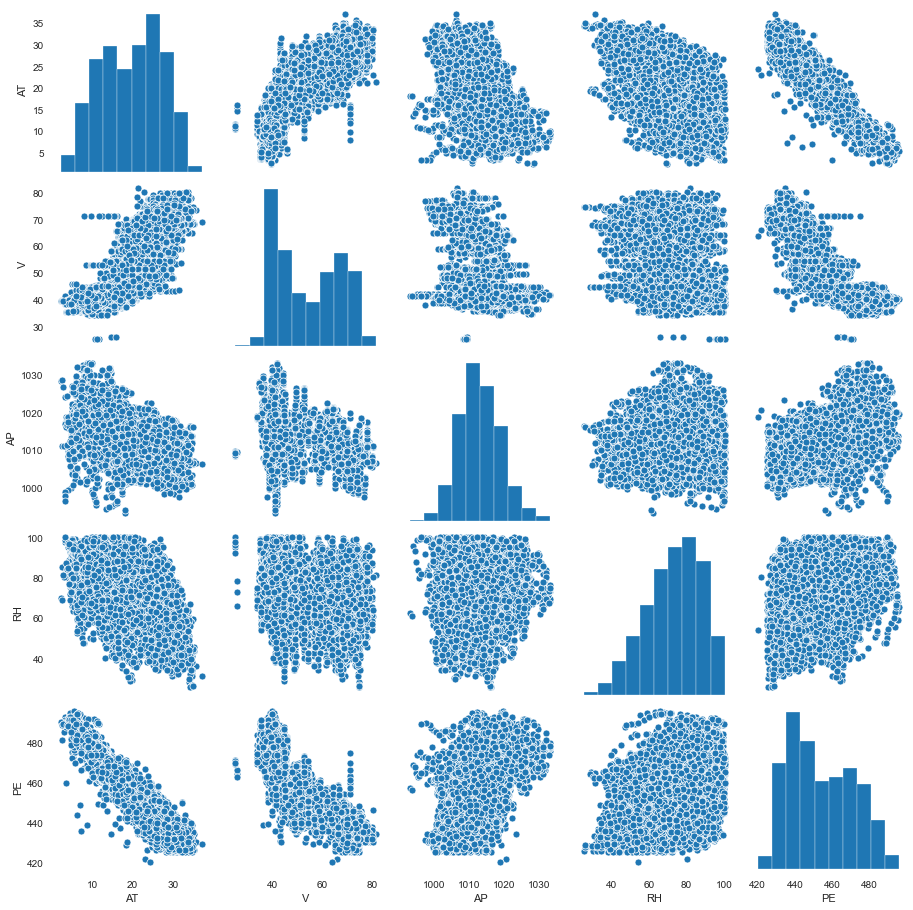

In [13]:
sns.pairplot(train_data)

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features,label, test_size = 0.2, random_state = 0)

In [15]:
from sklearn.ensemble import RandomForestRegressor
forest=RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [16]:
forest_pred=forest.predict(X_test)

In [17]:
forest_pred

array([427.2072, 432.7208, 444.4515, ..., 437.1605, 433.5975, 447.6106])

In [18]:
mse=metrics.mean_squared_error(y_test,forest_pred)
mse

11.972711890324971

In [19]:
rmse=np.sqrt(mse)
rmse

3.4601606740619677

In [20]:
test_data=pd.read_csv(r"C:\Users\user\Desktop\Data sets\test_power plant.csv")

In [21]:
test_data.head()

,AT,V,AP,RH
0,11.55,40.60,1014.44,87.06
1,6.61,38.91,1015.77,92.31
2,16.97,42.86,1013.92,74.80
3,21.90,57.76,1017.45,66.89
4,9.73,40.22,1011.48,87.88


In [22]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1568 entries, 0 to 1567
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      1568 non-null   float64
 1   V       1568 non-null   float64
 2   AP      1568 non-null   float64
 3   RH      1568 non-null   float64
dtypes: float64(4)
memory usage: 49.1 KB


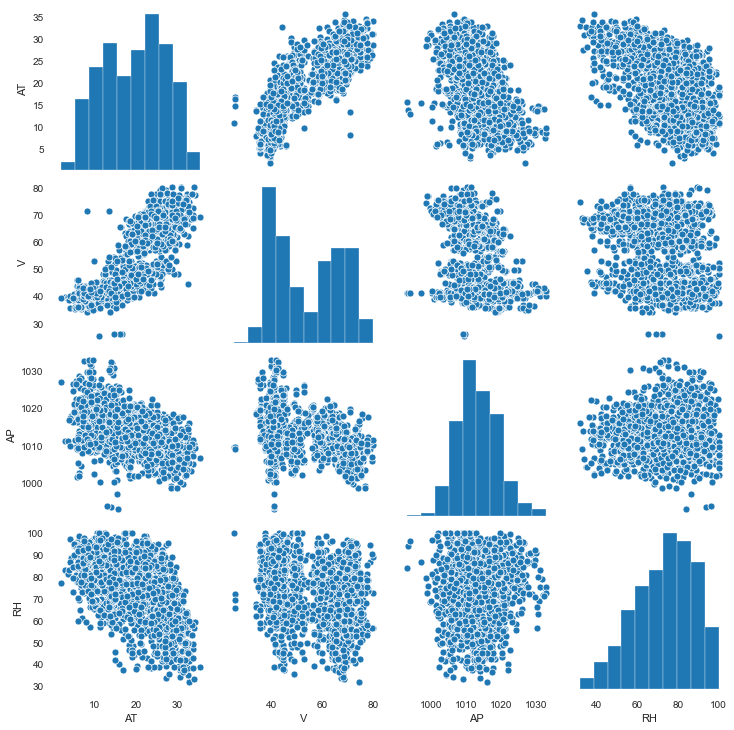

In [23]:
sns.pairplot(test_data)

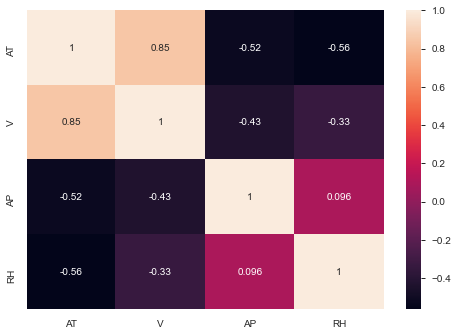

In [24]:
sns.heatmap(test_data.corr(),annot=True)

In [25]:
x=test_data

In [26]:
test_data['Value']=forest.predict(x)

In [27]:
test_data.head()

,AT,V,AP,RH,Value
0,11.55,40.60,1014.44,87.06,474.9735
1,6.61,38.91,1015.77,92.31,488.7330
2,16.97,42.86,1013.92,74.80,463.2360
3,21.90,57.76,1017.45,66.89,451.7214
4,9.73,40.22,1011.48,87.88,479.1111


In [28]:
test_data.columns 

Index(['AT', 'V', 'AP', 'RH', 'Value'], dtype='object')

In [31]:
result=test_data['Value']

In [33]:
result.to_csv('power.csv',index=True)